## Load Pickle Data

In [1]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
# Import necessary items from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation, Dropout, UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D, BatchNormalization
# from tensorflow.keras.layers.BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import cv2

In [2]:
# TODO: write your code here
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)


In [3]:
# Load training images
path = '/scratch1/pswaroo/data/curated_data/final_data/'

## SIZE of IMAGES : 60% of original

In [4]:
train_images = np.load(path+'images_final_normalized_resized/full_images_norm_resized.npy')
train_labels = np.load(path+'labels_final_normalized_resized/full_labels_resized.npy')

In [5]:
train_images.shape

(15630, 432, 768, 3)

In [6]:
train_labels.shape

(15630, 432, 768)

In [22]:
# my_data = tf.convert_to_tensor(train_images)

2022-05-02 18:57:50.925241: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-02 18:57:50.978897: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-05-02 18:57:50.982323: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-02 18:57:51.017524: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-02 18:57:51.040540: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-02 18:57:51.078949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so

In [ ]:
# my_labels = tf.convert_to_tensor(train_labels)

In [7]:
sess = tf.compat.v1.Session()

2022-05-02 19:01:18.731939: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-02 19:01:18.781068: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-05-02 19:01:18.783384: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-02 19:01:18.812853: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-02 19:01:18.835834: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-02 19:01:18.862705: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so

In [8]:
sess.run(tf.random_shuffle(train_images, seed=8))

AttributeError: module 'tensorflow' has no attribute 'random_shuffle'

In [ ]:
sess.run(tf.random_shuffle(train_labels, seed=8))

In [9]:
s=int(15630*0.8)

x_train=train_images[:s]
y_train=train_labels[:s]
x_test=train_images[s:]
y_test=train_labels[s:]

In [10]:
x_train.shape

(12504, 432, 768, 3)

In [11]:
y_train.shape

(12504, 432, 768)

In [12]:
x_test.shape

(3126, 432, 768, 3)

In [13]:
x_test.shape

(3126, 432, 768, 3)

In [14]:
## filter_size = (5, 5)
# activation_type = 'relu'
pool_size = (2,2)

model = tf.keras.Sequential()
# model = Sequential()

# Below layers were re-named for easier reading of model summary; this not necessary

# Conv Layer 1
model.add(layers.Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'tanh', name = 'Conv1',input_shape=(432, 768,3)))

# Conv Layer 2
model.add(layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'tanh', name = 'Conv2'))

# Pooling 1
model.add(layers.MaxPooling2D(pool_size=pool_size))

# Conv Layer 3
model.add(layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'tanh', name = 'Conv3'))
model.add(layers.Dropout(0.2))

# Conv Layer 4
model.add(layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(layers.Dropout(0.2))

# Conv Layer 5
model.add(layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'tanh', name = 'Conv5'))
model.add(layers.Dropout(0.2))

# Pooling 2
model.add(layers.MaxPooling2D(pool_size=pool_size))

# Conv Layer 6
model.add(layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(layers.Dropout(0.2))

# Conv Layer 7
model.add(layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(layers.Dropout(0.2))

# Pooling 3
model.add(layers.MaxPooling2D(pool_size=pool_size))

# Upsample 1
model.add(layers.UpSampling2D(size=pool_size))

# Deconv 1
model.add(layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(layers.Dropout(0.2))

# Deconv 2
model.add(layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(layers.Dropout(0.2))

# Upsample 2
model.add(layers.UpSampling2D(size=pool_size))

# Deconv 3
model.add(layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(layers.Dropout(0.2))

# Deconv 4
model.add(layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(layers.Dropout(0.2))

# Deconv 5
model.add(layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(layers.Dropout(0.2))

# Upsample 3
model.add(layers.UpSampling2D(size=pool_size))

# Deconv 6
model.add(layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'tanh', name = 'Deconv6'))

# Final layer - only including one channel so 1 filter
model.add(layers.Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'sigmoid', name = 'Final'))

model.summary()

2022-05-02 19:01:41.442673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-05-02 19:01:41.442748: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-02 19:01:41.442759: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-02 19:01:41.442768: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-02 19:01:41.442776: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-05-02 19:01:41.442784: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolv

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 430, 766, 8)       224       
_________________________________________________________________
Conv2 (Conv2D)               (None, 428, 764, 16)      1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 214, 382, 16)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 212, 380, 16)      2320      
_________________________________________________________________
dropout (Dropout)            (None, 212, 380, 16)      0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 210, 378, 32)      4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 210, 378, 32)      0

In [15]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


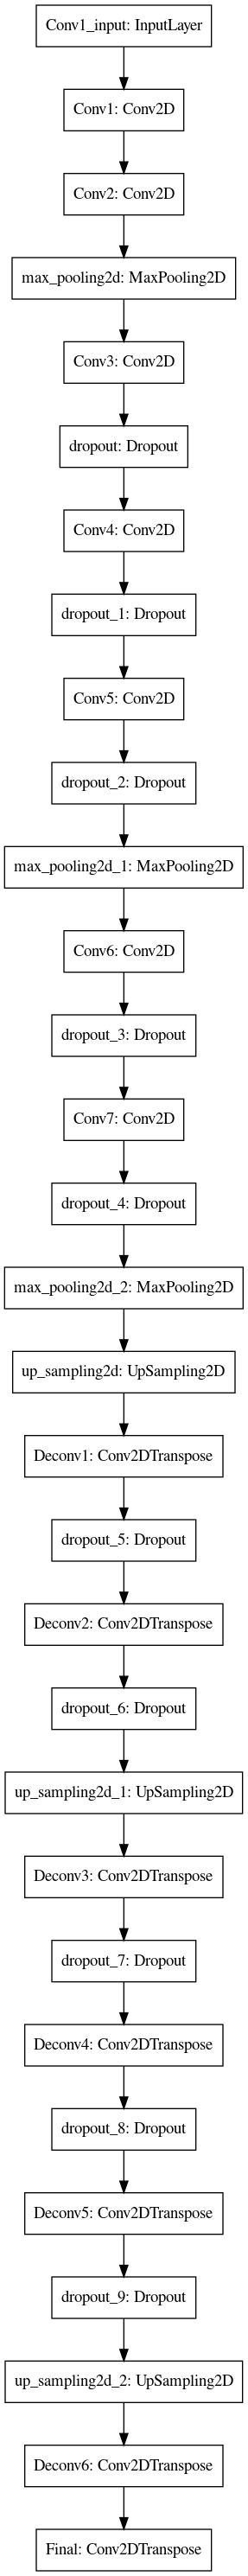

In [17]:
tf.keras.utils.plot_model(
    model, to_file='model.png')

In [18]:
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)


In [19]:
print(len(tf.config.list_physical_devices('GPU')))

1


In [21]:
# TODO: write your code here
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
batch_size = 32
epochs =10
opt=tf.keras.optimizers.Adam(lr=0.001)
# metric=[tf.keras.metrics.IoU(num_classes=2,class_ids=[0])]
model.compile(optimizer=opt, loss="mean_squared_error",metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])
history = model.fit(x_train, y_train, batch_size=batch_size, steps_per_epoch=len(x_train)/batch_size,epochs=epochs)
model.save("60percent_10e_32b_80t")

2022-05-02 19:02:30.013002: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33188216832 exceeds 10% of system memory.


Train on 12504 samples
Epoch 1/10


2022-05-02 19:02:42.369535: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-02 19:02:43.524372: W tensorflow/stream_executor/gpu/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.
2022-05-02 19:02:43.619100: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


12504/12504 [==============================] - 131s 11ms/sample - loss: 0.1037 - mean_io_u_1: 0.4415
Epoch 2/10
12504/12504 [==============================] - 122s 10ms/sample - loss: 0.0993 - mean_io_u_1: 0.4415
Epoch 3/10
12504/12504 [==============================] - 121s 10ms/sample - loss: 0.0906 - mean_io_u_1: 0.4415
Epoch 4/10
12504/12504 [==============================] - 121s 10ms/sample - loss: 0.0883 - mean_io_u_1: 0.4415
Epoch 5/10
12504/12504 [==============================] - 122s 10ms/sample - loss: 0.0850 - mean_io_u_1: 0.4415
Epoch 6/10
12504/12504 [==============================] - 122s 10ms/sample - loss: 0.0792 - mean_io_u_1: 0.4415
Epoch 7/10
12504/12504 [==============================] - 123s 10ms/sample - loss: 0.0752 - mean_io_u_1: 0.4415
Epoch 8/10
12504/12504 [==============================] - 122s 10ms/sample - loss: 0.0731 - mean_io_u_1: 0.4415
Epoch 9/10
12504/12504 [==============================] - 123s 10ms/sample - loss: 0.0718 - mean_io_u_1: 0.4415
Epo

2022-05-02 19:23:13.446033: W tensorflow/python/util/util.cc:319] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 60percent_10e_32b_80t/assets


In [22]:
results = model.evaluate(x_test,y_test,batch_size=32)

3126/3126 [==============================] - 17s 5ms/sample - loss: 0.0796 - mean_io_u_1: 0.4422


In [24]:
sess.close()

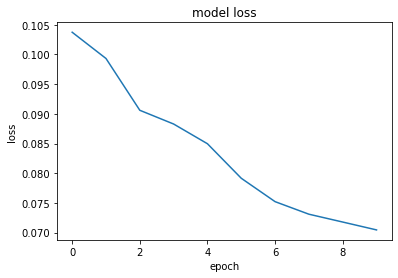

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss_Model1")

In [26]:
def compute_iou(y_pred, y_true):
    # ytrue, ypred is a flatten vector
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels = [0, 1])
    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

In [33]:
y_pred = model.predict(x_test)
y_true=y_test

In [35]:
y_pred[y_pred <= 0.6] = 0
y_pred[y_pred > 0.6] = 1

In [36]:
from sklearn.metrics import confusion_matrix
m_iou=[]
for i in range(130):
    m_iou.append(compute_iou(y_pred[i], y_true[i]))
print(np.nanmean(m_iou))

/home/sanskrj/.conda/envs/CRYPTOCODE2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/sanskrj/.conda/envs/CRYPTOCODE2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/sanskrj/.conda/envs/CRYPTOCODE2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/sanskrj/.conda/envs/CRYPTOCODE2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/sanskrj/.conda/envs/CRYPTOCODE2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back 

0.4604317850234518


In [38]:
print('Test loss:', results[0]) 
print('Test accuracy:', results[1])

Test loss: 0.07961718073104028
Test accuracy: 0.4421836
